# Logistic Regression and SVM (Support Vecor Machines)
---
__Author Name : Shreyansh Padarha__<br>
__Email : mailto:shreyansh.padarha@hotmail.com__

---

> # Introduction

The notebook in the directory delves into the fascinating world of Support Vector Machines (SVMs) and Logistic Regression (LR) in the context of classification. SVMs and LR are widely used machine learning algorithms that play a crucial role in various domains, including pattern recognition, natural language processing, and image classification. In this notebook, we explore these algorithms' capabilities and compare their suitability for classification tasks using two carefully crafted datasets. These datasets are designed to have more than 50% informative features and a minimum of 2500 rows, ensuring their complexity and representativeness. Additionally, we apply feature scaling techniques to enhance the models' performance, and meticulously evaluate the impact of these transformations on the final classification results. The notebook provides a comprehensive and structured analysis, presenting our findings and insights in a clear and concise manner, enabling readers to gain a deeper understanding of SVMs, LR, and their applicability in classification tasks.

---
> # Objectives 

- Make two classification datasets, having more than 50% informative features and a minimum of 2500 rows.
- Do some kind of Scaling on the first 5 features
- Compare the suitability of above datasets when performing Logistic Regression and Support Vector Machines.
- Check whether the applied transformation have an impact on the final quality of Classification Model, and present tge findings neatly.

---

># Notebook Working Status


|Objective No.|Description||Status|
|---|---|---|---|
|__1)__|*Make Two Classification Datasets*||__Completed__|
|__2)__|*Scaling of first 5 features*||__Completed__|
|__3)__|*Performing Log Reg. and SVM*|| __Completed__|
|__4)__|*Impact of Scaling and transformations on the result* || __Completed__|

---

# Making Classification datasets using `make_classification` of scikit

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

## Creating a Multi Class Classification dataset (5 classes)

In [2]:
X_1, y_1 = make_classification(n_samples = 5000,
                               n_features = 25,
                               n_informative = 14,
                               n_redundant = 7,
                               n_classes=5)

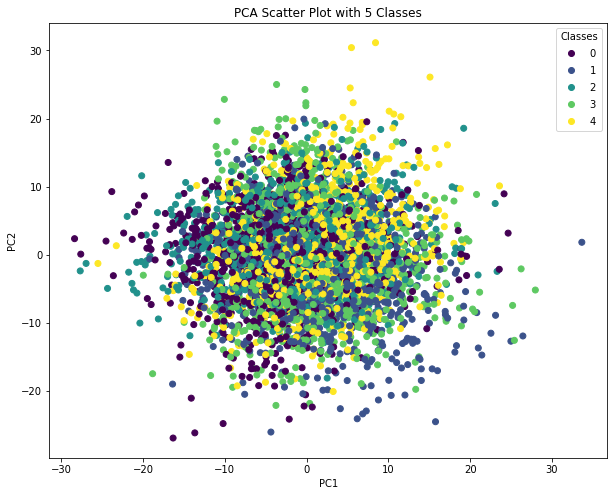

In [3]:
# Performing PCA to reduce the dimensionality from 25 to 2 components
pca = PCA(n_components=2)
X_1_pca = pca.fit_transform(X_1)

# Creating a scatter plot with different colors for each class
plt.figure(figsize=(10,8))

scatter = plt.scatter(X_1_pca[:,0],
                      X_1_pca[:,1],
                      c=y_1,
                      cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with 5 Classes')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


## Creating a Multi Class Classification dataset (2 classes)

In [5]:
#Using make_classification to create a dataset with the target variable having 2 classes
X_2, y_2 = make_classification(n_samples = 3000,
                               n_features = 15,
                               n_informative = 8,
                               n_redundant = 3,
                               n_classes=2)

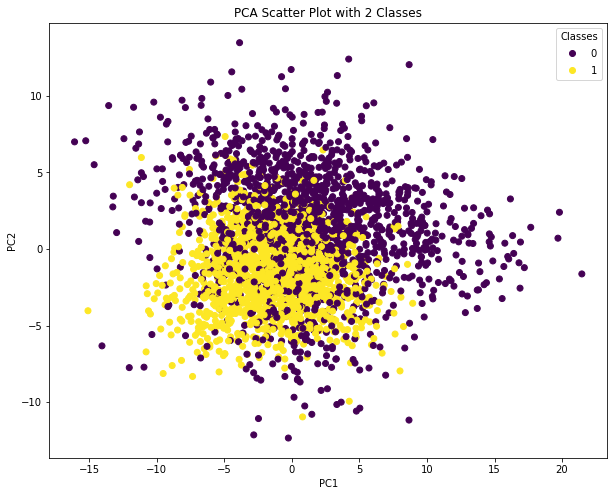

In [6]:
# Performing PCA to reduce the dimensionality from 25 to 2 components
pca = PCA(n_components=2)
X_2_pca = pca.fit_transform(X_2)

# Creating a scatter plot with different colors for each class
plt.figure(figsize=(10,8))

scatter = plt.scatter(X_2_pca[:,0],
                      X_2_pca[:,1],
                      c=y_2,
                      cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with 2 Classes')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


In [9]:
import pandas as pd
pd.DataFrame(X_2).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.000058,0.447653,0.033270,1.217925,-0.592122,-0.024219,0.002700,-0.517089,0.539303,-0.459914,0.023010,-0.486631,-0.024857,1.198982,-0.020937
std,1.016902,1.894181,1.003099,3.277295,2.719902,1.013245,1.830273,1.940394,1.707254,1.647294,1.864766,1.934424,1.881171,3.333179,0.999090
min,-4.081892,-6.295653,-3.667105,-11.284774,-10.093702,-4.062129,-6.508374,-7.174066,-4.437190,-5.309114,-8.776709,-7.192175,-6.030670,-12.149178,-3.601892
25%,-0.672444,-0.805813,-0.657408,-0.870528,-2.364214,-0.702544,-1.228682,-1.850613,-0.606547,-1.642174,-1.117774,-1.799460,-1.235975,-0.689131,-0.676057
50%,0.007593,0.510265,0.022876,1.352480,-0.917679,-0.019601,-0.015289,-0.593533,0.596933,-0.466839,0.158861,-0.558258,0.068135,1.377676,-0.012424
75%,0.681467,1.728012,0.707707,3.303787,0.939652,0.655429,1.279841,0.732055,1.679461,0.685923,1.344030,0.770893,1.267556,3.460445,0.645453
max,3.558716,7.421414,3.158659,12.915758,9.630049,3.545286,5.778857,6.569735,6.534892,5.532722,5.204846,7.116429,6.293230,11.892321,3.216717


In [10]:
pd.DataFrame(y_1).describe()

,0
count,5000.000000
mean,1.993000
std,1.413701
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


---

# `Scaling` 5 features on each dataset

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


df_x1 = pd.DataFrame(X_1)
df_x2 = pd.DataFrame(X_2)

## Min Max Scaling

### Min Max Scaling (X1 Dataset)

In [12]:
mms = MinMaxScaler()

In [13]:
# Min Max Scaling 5 features in X2 and storing it in a different variable
x1_minmax = mms.fit_transform(X_1[:, 5:10])
x1_minmax_df = df_x1.copy()
x1_minmax_df.iloc[:, 5:10] = x1_minmax

### Min Max Scaling (X2 Dataset)

In [14]:
# Min Max Scaling 5 features in X2 and storing it in a different variable
x2_minmax = mms.fit_transform(X_2[:, 7:12])
x2_minmax_df = df_x2.copy()
x2_minmax_df.iloc[:, 7:12] = x2_minmax


## Standard Scaling
Standardize features by removing the mean and scaling to unit variance.<br>
The standard score of a sample x is calculated as:  $z = (x - u) / s$

In [15]:
ss = StandardScaler()

### Standard Scaling (X1 Dataset)

In [16]:
# Standard Scaling 5 features in X1 and storing it in a different variable
# Min Max Scaling 5 features in X2 and storing it in a different variable
x1_ss = ss.fit_transform(X_1[:, 18:23])
x1_ss_df = df_x1.copy()
x1_ss_df.iloc[:, 7:12] = x1_ss

### Standard Scaling (X2 Dataset)

In [17]:
# Standard Scaling 5 features in X2 and storing it in a different variable
x2_ss = ss.fit_transform(X_2[:, 1:6])
x2_ss_df = df_x2.copy()
x2_ss_df.iloc[:, 1:6] = x2_ss

---

# Creating SVM, Log Regression models using different hyperparameters

# Manual Hyperparameter Tuning

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [19]:
#Creating an empty dataframe
results_lr_df = pd.DataFrame(columns = ['Dataset',
                                        'Training Size',
                                        'Testing Size',
                                        'Penalty',
                                        "C",
                                        "Solver",
                                       "Accuracy Score"
                                       ])

In [20]:
#Datasets dictionary
dfs = {"BinClass" : [df_x2,y_2],
       "BinClass Min Max Scalled" : [x2_minmax_df,y_2],
       "BinClass Standard Scalled" : [x2_ss_df,y_2],
       "MultiClass" : [df_x1,y_1],
       "MultiClass Min Max Scalled" : [x1_minmax_df, y_1],
       "MultiClass Standard Scalled" : [x1_ss_df ,y_1]}

#C --> Inverse of regularisation strength 

#Hyperparameters
lr_hp = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 50],
    'solver': ['liblinear', 'saga']
        }

#Model parameters
test_splits = [0.35,0.2]

#Creating an empty array 
dataset = []
training_size = []
testing_size = []
penalty = []
C = []
Solver = []
accuracy_scores_arr = []

#Manual Hyper parameters
for splits in test_splits:
        for p in lr_hp['penalty']:
            for c in lr_hp["C"]:
                for s in lr_hp['solver']:
                        for datasets in dfs:

                            #Splitting the data
                            X_train, X_test, y_train, y_test = train_test_split(
                                dfs[datasets][0].values.tolist(),
                                dfs[datasets][1], 
                                test_size = splits,
                                random_state=42)
                            #Performing logistic regression
                            lr_clf = LogisticRegression(penalty = p, 
                                                        multi_class = "auto",
                                                        C = c,
                                                        solver = s).fit(X_train , y_train)
                            
                            #Predicting 
                            predicted_values = lr_clf.predict(X_test)
                            
                            #Accuracy Score of predictions
                            acc_score = accuracy_score(predicted_values,y_test)
                            test_split = str(int(splits*100)) + " %"
                            train_split = str(int((1-splits)*100))+" %"
                            
                            dataset.append(datasets)
                            training_size.append(train_split)
                            testing_size.append(test_split)
                            penalty.append(p)
                            C.append(c)
                            Solver.append(s)
                            accuracy_scores_arr.append(acc_score)

In [21]:
results_lr_df['Dataset'] = dataset
results_lr_df['Training Size'] = training_size
results_lr_df['Testing Size'] = testing_size
results_lr_df['Penalty'] = penalty 
results_lr_df["C"] = C
results_lr_df["Solver"] = Solver
results_lr_df["Accuracy Score"] = accuracy_scores_arr

In [22]:
results_lr_df.sample(8)

,Dataset,Training Size,Testing Size,Penalty,C,Solver,Accuracy Score
47,MultiClass Standard Scalled,65 %,35 %,l1,50.0,saga,0.468571
0,BinClass,65 %,35 %,l1,0.1,liblinear,0.863810
118,MultiClass Min Max Scalled,80 %,20 %,l1,1.0,saga,0.475000
27,MultiClass,65 %,35 %,l1,10.0,liblinear,0.458857
20,BinClass Standard Scalled,65 %,35 %,l1,1.0,saga,0.866667
69,MultiClass,65 %,35 %,l2,1.0,saga,0.468000
164,BinClass Standard Scalled,80 %,20 %,l2,1.0,saga,0.851667
44,BinClass Standard Scalled,65 %,35 %,l1,50.0,saga,0.867619


In [23]:
results_lr_df.to_csv("logistic_reg_make_class_analysis.csv")

## SVM (Support Vector Machine

In [52]:
results_svm_df = pd.DataFrame(columns = ['Dataset',
                                        'Training Size',
                                        'Testing Size',
                                        'Kernel',
                                        "C",
                                       "Accuracy Score"
                                       ])

In [25]:
#Datasets dictionary
dfs = {"BinClass" : [df_x2,y_2],
       "BinClass Min Max Scalled" : [x2_minmax_df,y_2],
       "BinClass Standard Scalled" : [x2_ss_df,y_2],
       "MultiClass" : [df_x1,y_1],
       "MultiClass Min Max Scalled" : [x1_minmax_df, y_1],
       "MultiClass Standard Scalled" : [x1_ss_df ,y_1]}


#Hyperparameters
svm_hp = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'sigmoid']
}
#Model parameters
test_splits = [0.35,0.2]

#Creating an empty array 
dataset = []
training_size = []
testing_size = []
kernel = []
C = []
accuracy_scores_arr_svm = []


#Manual Hyper parameters
for splits in test_splits:
            for c in svm_hp["C"]:
                for k in svm_hp['kernel']:
                        for datasets in dfs:
                            #Splitting the data
                            X_train, X_test, y_train, y_test = train_test_split(
                                dfs[datasets][0].values.tolist(),
                                dfs[datasets][1], 
                                test_size = splits,
                                random_state=42)
                            
                            #Performing logistic regression
                            svm_clf = SVC(kernel = k, C = c).fit(X_train , y_train)
                            
                            #Predicting 
                            predicted_values = svm_clf.predict(X_test)
                            
                            #Accuracy Score of predictions
                            acc_score = accuracy_score(predicted_values,y_test)
                            test_split = str(int(splits*100)) + " %"
                            train_split = str(int((1-splits)*100))+" %"
                            
                            dataset.append(datasets)
                            training_size.append(train_split)
                            testing_size.append(test_split)
                            C.append(c)
                            kernel.append(k)
                            accuracy_scores_arr_svm.append(acc_score)

In [53]:
results_svm_df['Dataset'] = dataset
results_svm_df['Training Size'] = training_size
results_svm_df['Testing Size'] = testing_size
results_svm_df["C"] = C
results_svm_df["Kernel"] = kernel
results_svm_df["Accuracy Score"] = accuracy_scores_arr_svm

In [54]:
results_svm_df.sample(8)

,Dataset,Training Size,Testing Size,Kernel,C,Accuracy Score
25,BinClass Min Max Scalled,65 %,35 %,poly,1.0,0.897143
107,MultiClass Standard Scalled,80 %,20 %,sigmoid,10.0,0.262000
55,BinClass Min Max Scalled,80 %,20 %,linear,0.1,0.840000
1,BinClass Min Max Scalled,65 %,35 %,linear,0.1,0.853333
54,BinClass,80 %,20 %,linear,0.1,0.856667
64,MultiClass Min Max Scalled,80 %,20 %,poly,0.1,0.655000
74,BinClass Standard Scalled,80 %,20 %,linear,1.0,0.856667
78,BinClass,80 %,20 %,poly,1.0,0.940000


In [55]:
results_svm_df.to_csv("svm_make_class_analysis.csv")

# Comparing Model performances

In [56]:
import seaborn as sns

<AxesSubplot:xlabel='Accuracy Score', ylabel='Dataset'>

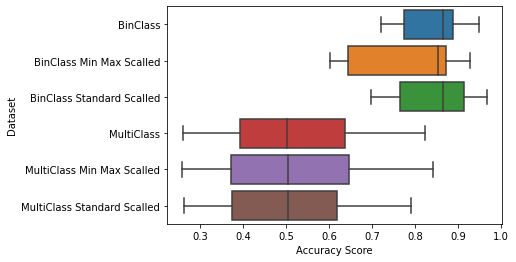

In [57]:
sns.boxplot(data = results_svm_df, y = "Dataset", x = "Accuracy Score" )

<AxesSubplot:xlabel='Accuracy Score', ylabel='Dataset'>

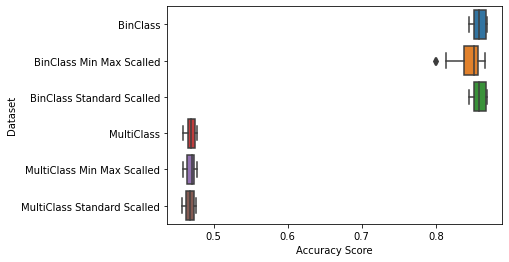

In [58]:
sns.boxplot(data = results_lr_df, y = "Dataset", x = "Accuracy Score" )

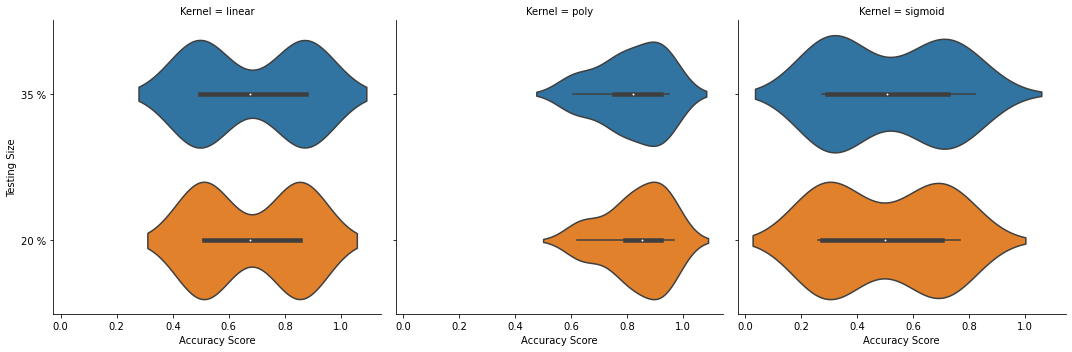

In [59]:
sns.catplot(data = results_svm_df, y = 'Testing Size', x = 'Accuracy Score',kind = 'violin',
            col='Kernel')

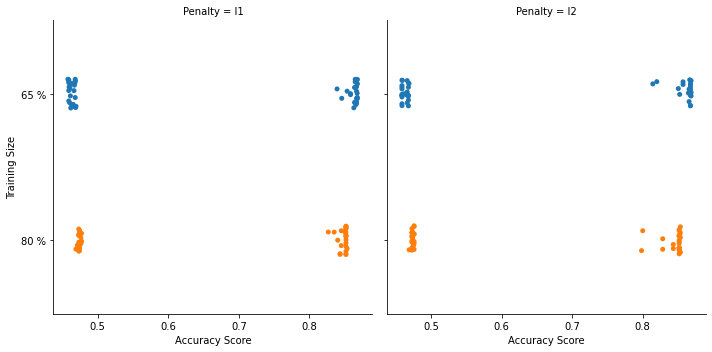

In [60]:
sns.catplot(data = results_lr_df, y = 'Training Size', x = 'Accuracy Score',col='Penalty')

### Chosing the best samples from both the datasets

In [ ]:
# 3 best samples from each dataset for each ml model


In [125]:
best_results_svm = pd.DataFrame(columns = ['Dataset',
                                        'Training Size',
                                        'Testing Size',
                                        'Kernel',
                                        "C",
                                       "Accuracy Score"
                                       ])

for dataset in results_lr_df["Dataset"].unique():
    subset = results_svm_df[results_svm_df["Dataset"]==dataset]
    nlargest = subset.nlargest(3,['Accuracy Score']).reset_index(drop=True)
    best_results_svm = best_results_svm.append(nlargest,ignore_index=True)

In [126]:
best_results_svm

,Dataset,Training Size,Testing Size,Kernel,C,Accuracy Score
0,BinClass,80 %,20 %,poly,10.0,0.948333
1,BinClass,80 %,20 %,poly,1.0,0.940000
2,BinClass,65 %,35 %,poly,10.0,0.939048
3,BinClass Min Max Scalled,65 %,35 %,poly,10.0,0.927619
4,BinClass Min Max Scalled,80 %,20 %,poly,10.0,0.921667
5,BinClass Min Max Scalled,80 %,20 %,poly,1.0,0.900000
6,BinClass Standard Scalled,80 %,20 %,poly,10.0,0.966667
7,BinClass Standard Scalled,65 %,35 %,poly,10.0,0.951429
8,BinClass Standard Scalled,80 %,20 %,poly,1.0,0.945000
9,MultiClass,80 %,20 %,poly,10.0,0.823000


<AxesSubplot:xlabel='Accuracy Score', ylabel='Density'>

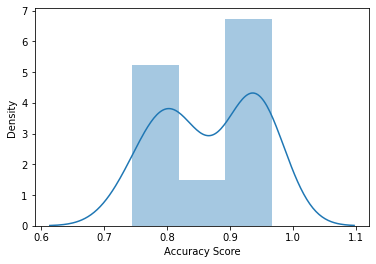

In [131]:
sns.distplot(best_results_svm['Accuracy Score'])

__Inference:__<br><br>
For the given datasets:
1. SVM performs best with the polynomial kernel, which is a kernel function that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.
2. C values of 1 and 10, perform the best (they add penalty to each misclassified point).

In [123]:
best_results_lr = pd.DataFrame(columns = ['Dataset',
                                        'Training Size',
                                        'Testing Size',
                                        'Penalty',
                                        "C",
                                        "Solver",
                                       "Accuracy Score"
                                       ])

for dataset in results_lr_df["Dataset"].unique():
    subset = results_lr_df[results_lr_df["Dataset"]==dataset]
    nlargest = subset.nlargest(3,['Accuracy Score']).reset_index(drop=True)
    best_results_lr = best_results_lr.append(nlargest,ignore_index=True)

In [124]:
best_results_lr

,Dataset,Training Size,Testing Size,Penalty,C,Solver,Accuracy Score
0,BinClass,65 %,35 %,l2,1.0,liblinear,0.868571
1,BinClass,65 %,35 %,l1,10.0,liblinear,0.867619
2,BinClass,65 %,35 %,l1,10.0,saga,0.867619
3,BinClass Min Max Scalled,65 %,35 %,l1,50.0,liblinear,0.866667
4,BinClass Min Max Scalled,65 %,35 %,l1,10.0,liblinear,0.865714
5,BinClass Min Max Scalled,65 %,35 %,l2,50.0,liblinear,0.865714
6,BinClass Standard Scalled,65 %,35 %,l2,0.1,saga,0.868571
7,BinClass Standard Scalled,65 %,35 %,l2,1.0,liblinear,0.868571
8,BinClass Standard Scalled,65 %,35 %,l1,10.0,liblinear,0.867619
9,MultiClass,80 %,20 %,l1,1.0,saga,0.477000


<AxesSubplot:xlabel='Accuracy Score', ylabel='Density'>

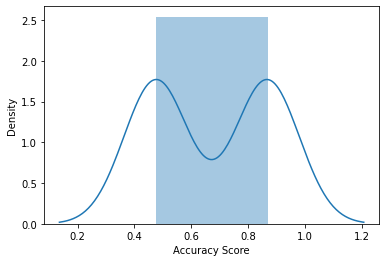

In [132]:
sns.distplot(best_results_lr['Accuracy Score'])

# PLAYGROUND (Rough Work)

In [ ]:
### The code below was not working due to computation limitations.

from sklearn.model_selection import GridSearchCV

#User Defined function for performing Logistic Regression using GridSearcCV


def logistic_grid_search(X_train, y_train, X_test, y_test,r_s):
    # Define the parameter grid for logistic regression
    param_grid = {'penalty': ['l1', 'l2'],
                  'C': [0.1, 1, 10, 100],
                  'solver': ['liblinear', 'saga']}

    # Create an instance of GridSearchCV for logistic regression
    grid_search = GridSearchCV(LogisticRegression(random_state=r_s,max_iter=10000), 
                               param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object on your training data
    grid_search.fit(X_train, y_train)

    # Retrieve the best parameters and best score for the model
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Use the best model to make predictions on the test data
    y_pred = grid_search.predict(X_test)

    # Calculate the accuracy score for the model
    accuracy = accuracy_score(y_test, y_pred)

    return best_params, best_score, accuracy
    
    
#User Defined function for performing SVM using GridSearcCV

def svm_grid_search(X_train, y_train, X_test, y_test,r_s):
    # Define the parameter grid for SVM
    param_grid = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

    # Create an instance of GridSearchCV for SVM
    grid_search = GridSearchCV(SVC(random_state=r_s), param_grid=param_grid, cv=5)

    # Fit the GridSearchCV object on your training data
    grid_search.fit(X_train, y_train)

    # Retrieve the best parameters and best score for the model
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Use the best model to make predictions on the test data
    y_pred = grid_search.predict(X_test)

    # Calculate the accuracy score for the model
    accuracy = accuracy_score(y_test, y_pred)

    return best_params, best_score, accuracy
    

### Driver Code

"""
test_train_splits = [[0.35,0.65],[0.4,0.6],[0.2,0.8]]
random_states = [0, 10, 42, 50]

for splits in test_train_splits:
    for states in random_states:
        print("Trainning and Testing Splits : ", splits)
        print("Random State : ", states)
        X_train, X_test, y_train, y_test = train_test_split(x1_ss_df.values.tolist(),
                                                            y_1,
                                                            test_size = splits[0], 
                                                            random_state=states)
        
        logistic_grid_search(X_train, y_train, X_test, y_test,states)
        svm_grid_search(X_train, y_train, X_test, y_test,states)
"""